In [4]:
import os

import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras import layers, models

import pickle

In [6]:
from transformation_funcs import retrieve_images, transform_image

In [9]:
train_dirs_paths = "../data_collection/raw/training_set"
test_dirs_paths = "../data_collection/raw/validation_set"

classes = os.listdir(train_dirs_paths)

In [10]:
raw_df = retrieve_images(train_dirs_paths)

Se procesaron 6621 imágenes correctamente.
108 no pudieron ser procesadas por errores en formato.
Se encontraron 1567 imágenes duplicadas


In [14]:
raw_df["ruta_fixed"] = raw_df["ruta"].str.replace("../data_collection/raw/", "bin/dataset_updated/")

In [39]:
X = np.stack(np.array(raw_df['matriz']), axis=0)
y = np.stack(np.array(raw_df['clase']), axis=0)
filename_paths = np.stack(np.array(raw_df['ruta']))
filename_paths_model = np.stack(np.array(raw_df['ruta_fixed']))

In [17]:
# Encode class labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

with open("../exports/label_encoder.pickle", "wb") as file:
    pickle.dump(label_encoder, file)

np.save('../exports/X.npy', X)
np.save('../exports/y.npy', y)
np.save('../exports/y_encoded.npy', y_encoded)
np.save('../exports/file_paths.npy', filename_paths)

In [18]:
X = np.load("../exports/X.npy")
y = np.load("../exports/y.npy")
y_encoded = np.load("../exports/y_encoded.npy")

filename_paths = np.load("../exports/file_paths.npy")

with open('../exports/label_encoder.pickle', 'rb') as f:
    label_encoder = pickle.load(f)

In [19]:
def create_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu', name='conv2d_3')(inputs)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_3')(x)

    x = layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_4')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_4')(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_5')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_5')(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', name='conv2d_6')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_6')(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', name='conv2d_7')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_7')(x)

    x = layers.GlobalAveragePooling2D(name='global_average_pooling2d_1')(x)

    x = layers.Dense(128, activation="relu", name='dense_8')(x)

    x = layers.Dense(128, activation="relu", name='dense_9')(x)

    x = layers.Dense(128, activation="relu", name='dense_10')(x)

    x = layers.Dense(128, activation="linear", name='dense_11')(x)

    outputs = layers.Dense(num_classes, activation='softmax', name='dense_12')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [20]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Parameters
input_shape = (150, 150, 3)
num_classes = len(classes)
k = 5  # Number of folds
epochs = 25
batch_size = 32

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Arrays to store results
history_list = []

# Perform K-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    model = create_model(input_shape, num_classes)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=1
    )
    
    history_list.append(history)

2024-06-01 22:23:00.645475: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-01 22:23:00.878448: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-01 22:23:00.878543: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-01 22:23:00.888979: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-01 22:23:00.889057: I external/local_xla/xla/stream_executor

Epoch 1/25


2024-06-01 22:23:07.186710: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-01 22:23:08.731063: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd13164beb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-01 22:23:08.731095: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-06-01 22:23:08.776405: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1717298588.944708    3576 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


166/166 [==============================] - 12s 21ms/step - loss: 1.2568 - accuracy: 0.5368 - val_loss: 1.0346 - val_accuracy: 0.5962
Epoch 2/25
166/166 [==============================] - 2s 12ms/step - loss: 0.9477 - accuracy: 0.6471 - val_loss: 0.8776 - val_accuracy: 0.6898
Epoch 3/25
166/166 [==============================] - 2s 12ms/step - loss: 0.8242 - accuracy: 0.7019 - val_loss: 0.8344 - val_accuracy: 0.6868
Epoch 4/25
166/166 [==============================] - 2s 13ms/step - loss: 0.7559 - accuracy: 0.7185 - val_loss: 0.8354 - val_accuracy: 0.6928
Epoch 5/25
166/166 [==============================] - 2s 13ms/step - loss: 0.7122 - accuracy: 0.7330 - val_loss: 0.7722 - val_accuracy: 0.6838
Epoch 6/25
166/166 [==============================] - 2s 12ms/step - loss: 0.6468 - accuracy: 0.7649 - val_loss: 0.7112 - val_accuracy: 0.7208
Epoch 7/25
166/166 [==============================] - 2s 12ms/step - loss: 0.5966 - accuracy: 0.7778 - val_loss: 0.6887 - val_accuracy: 0.7155
Epoch 8/2

## Gráficos de Precisión y Perdida

In [21]:
# Save training history using pickle
with open('../exports/training_history.pickle', 'wb') as file:
    pickle.dump(history_list, file)

In [22]:
with open('../exports/training_history.pickle', 'rb') as f:
    history_list = pickle.load(f)

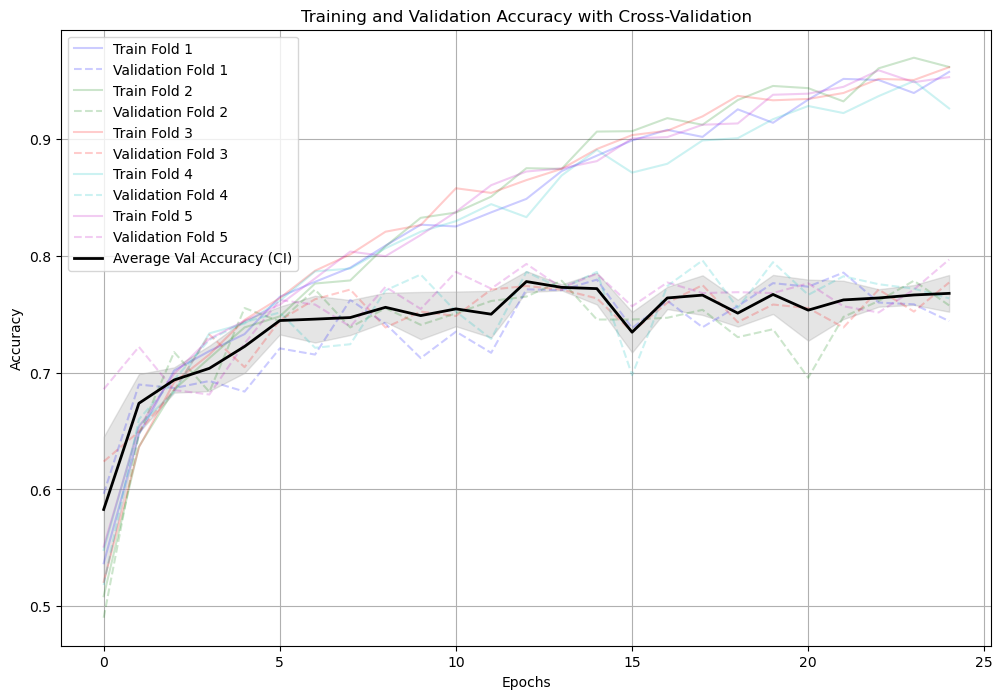

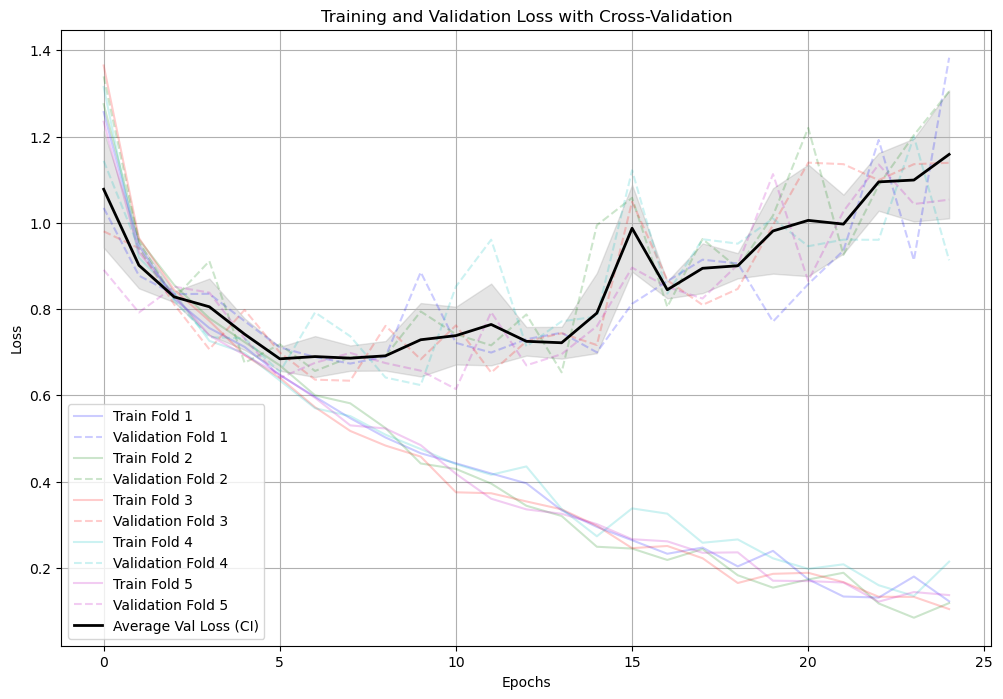

In [23]:
# Plot cross-validation results
def plot_cross_validation_results(history_list, metric='accuracy', ci=True, average_score=True):
    plt.figure(figsize=(12, 8))
    
    # Define a larger list of colors
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'olive']

    # Arrays to store metrics for all folds
    all_metrics = []

    alpha = 0.2 if ci else 1
    
    # Plot training and validation metrics for each fold
    for i, history in enumerate(history_list):
        color = colors[i % len(colors)]  # Cycle through colors
        
        # Plot individual fold metrics
        plt.plot(history.history[metric], label=f'Train Fold {i+1}', color=color, alpha=alpha)
        plt.plot(history.history[f'val_{metric}'], label=f'Validation Fold {i+1}', linestyle="--", color=color, alpha=alpha)
        
        # Store validation metrics for computing average and CI
        all_metrics.append(history.history[f'val_{metric}'])
    
    # Calculate average and confidence interval
    all_metrics = np.array(all_metrics)
    mean_metric = np.mean(all_metrics, axis=0)
    std_metric = np.std(all_metrics, axis=0)
    ci_lower = mean_metric - 1.96 * (std_metric / np.sqrt(len(history_list)))  # 95% confidence interval
    ci_upper = mean_metric + 1.96 * (std_metric / np.sqrt(len(history_list)))  # 95% confidence interval
    
    # Plot average metric with CI lines
    if average_score:
        plt.plot(mean_metric, label=f'Average Val {metric.capitalize()} (CI)', color='k', linewidth=2)
        if ci:
            plt.fill_between(range(len(mean_metric)), ci_lower, ci_upper, color='gray', alpha=0.2)
    
    plt.title(f'Training and Validation {metric.capitalize()} with Cross-Validation')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()
    plt.show()

plot_cross_validation_results(history_list, metric='accuracy', ci=True, average_score=True)
plot_cross_validation_results(history_list, metric='loss')

After 10 epocs the model has no improvement and starts to overfit, hence the model is trained with the data to that stage

In [24]:
model = create_model(input_shape, num_classes)
    
EPOCHS = 10
num_classes = len(classes)
batch_size = 32

history = model.fit(
    X, y_encoded,
    epochs=EPOCHS,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
207/207 [==============================] - 6s 18ms/step - loss: 1.4217 - accuracy: 0.5322
Epoch 2/10
207/207 [==============================] - 2s 12ms/step - loss: 0.9571 - accuracy: 0.6458
Epoch 3/10
207/207 [==============================] - 2s 12ms/step - loss: 0.8504 - accuracy: 0.6849
Epoch 4/10
207/207 [==============================] - 2s 11ms/step - loss: 0.7451 - accuracy: 0.7212
Epoch 5/10
207/207 [==============================] - 2s 11ms/step - loss: 0.6660 - accuracy: 0.7555
Epoch 6/10
207/207 [==============================] - 2s 11ms/step - loss: 0.6269 - accuracy: 0.7660
Epoch 7/10
207/207 [==============================] - 2s 12ms/step - loss: 0.5671 - accuracy: 0.7884
Epoch 8/10
207/207 [==============================] - 2s 12ms/step - loss: 0.5181 - accuracy: 0.8076
Epoch 9/10
207/207 [==============================] - 2s 12ms/step - loss: 0.4734 - accuracy: 0.8243
Epoch 10/10
207/207 [==============================] - 2s 11ms/step - loss: 0.4492 - accura

In [25]:
model.save("../exports/model.h5")

/home/jucajagu/anaconda3/envs/gpu-terminator/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
model = tf.keras.models.load_model('../exports/model.h5')

## Análisis de Separabilidad Embeddings

In [27]:
def create_visual_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu', name='conv2d_3')(inputs)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_3')(x)

    x = layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_4')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_4')(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_5')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_5')(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', name='conv2d_6')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_6')(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', name='conv2d_7')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_7')(x)

    x = layers.GlobalAveragePooling2D(name='global_average_pooling2d_1')(x)

    x = layers.Dense(128, activation="relu", name='dense_8')(x)

    x = layers.Dense(128, activation="relu", name='dense_9')(x)

    x = layers.Dense(128, activation="relu", name='dense_10')(x)

    x = layers.Dense(3, activation="linear", name='dense_11')(x)

    outputs = layers.Dense(num_classes, activation='softmax', name='dense_12')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [28]:
visual_model = create_visual_model(input_shape, num_classes)

visual_model.fit(
    X, y_encoded,
    epochs=EPOCHS,
    batch_size=batch_size,
)

Epoch 1/10
207/207 [==============================] - 5s 13ms/step - loss: 1.3480 - accuracy: 0.5336
Epoch 2/10
207/207 [==============================] - 2s 11ms/step - loss: 1.0211 - accuracy: 0.6449
Epoch 3/10
207/207 [==============================] - 2s 11ms/step - loss: 0.8534 - accuracy: 0.7071
Epoch 4/10
207/207 [==============================] - 2s 11ms/step - loss: 0.7906 - accuracy: 0.7322
Epoch 5/10
207/207 [==============================] - 2s 11ms/step - loss: 0.6854 - accuracy: 0.7594
Epoch 6/10
207/207 [==============================] - 2s 11ms/step - loss: 0.6478 - accuracy: 0.7769
Epoch 7/10
207/207 [==============================] - 2s 12ms/step - loss: 0.6179 - accuracy: 0.7725
Epoch 8/10
207/207 [==============================] - 2s 11ms/step - loss: 0.5387 - accuracy: 0.8058
Epoch 9/10
207/207 [==============================] - 2s 11ms/step - loss: 0.4781 - accuracy: 0.8307
Epoch 10/10
207/207 [==============================] - 2s 11ms/step - loss: 0.4465 - accura

In [29]:
sub_network = models.Model(inputs=visual_model.input, outputs=visual_model.layers[-2].output)
sub_network.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        1849

In [30]:
vector_prediction = sub_network.predict(X)
vector_prediction

207/207 [==============================] - 1s 4ms/step


array([[ -5.644923  ,   7.6466823 ,   3.7418509 ],
       [ -2.2446735 ,   5.138238  ,   2.0601501 ],
       [ -2.5951126 ,   2.9041905 ,  -0.34654605],
       ...,
       [  9.3473215 ,   0.08677675,  -5.124632  ],
       [  7.034878  ,   0.15446801,  -3.790815  ],
       [ 36.234844  ,  -1.5173652 , -15.344658  ]], dtype=float32)

In [31]:
x_vector, y_vector, z_vector = vector_prediction[:,0], vector_prediction[:,1], vector_prediction[:,2]

fig = px.scatter_3d(x=x_vector, y=y_vector, z=z_vector, color=y, opacity=0.4)
fig.update_traces(marker_size=5)

## Test Unitarios

1/1 [==============================] - 1s 561ms/step
Predicted Class Label: painting
Probability Prediction: 0.54


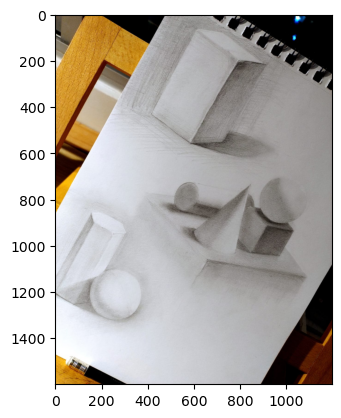

In [32]:
test_image_path = '../data_collection/unitary_tests/test.jpg'
test_image = transform_image(test_image_path)
test_image = np.expand_dims(test_image, axis=0) 

test_instance_prediction = model.predict(test_image)

predicted_label_encoded = np.argmax(test_instance_prediction, axis=1)[0]  # Get the index of the highest probability

predicted_label = label_encoder.inverse_transform([predicted_label_encoded])[0]  # Inverse transform to get the class label

print("Predicted Class Label:", predicted_label)
print("Probability Prediction:", np.round(np.max(test_instance_prediction), 2))

im = Image.open(test_image_path)
plt.imshow(np.asarray(im))

In [33]:
neighbors_sub_network = models.Model(inputs=model.input, outputs=model.layers[-2].output)
neighbors_sub_network.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        1849

In [34]:
neighbors_sub_network.save("../exports/neighbor_model.h5")

/home/jucajagu/anaconda3/envs/gpu-terminator/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [35]:
neighbors_sub_network = tf.keras.models.load_model('../exports/neighbor_model.h5')

In [36]:
neighbors_matrix = neighbors_sub_network.predict(X)

207/207 [==============================] - 1s 3ms/step


In [56]:
# Reshape y to be (6621, 1) and ensure it is treated as strings
y = y.astype(str).reshape(-1, 1)

# Ensure filename_paths is a column vector with shape (6621, 1)
filename_paths_embeddings = filename_paths_model.reshape(-1, 1)

# Concatenate the arrays along the second axis
embedding_images = np.concatenate([neighbors_matrix, y, filename_paths_embeddings], axis=1)

# Convert the concatenated array to a DataFrame
embedding_images_df = pd.DataFrame(embedding_images)

cols = list(embedding_images_df.columns)

cols[-1] = "location"
cols[-2] = "label"

embedding_images_df.columns = cols

embedding_images_df.to_csv("../exports/embedding_images.csv", index=False)

In [45]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5).fit(neighbors_matrix)

In [46]:
test_vector = neighbors_sub_network.predict(test_image)
test_vector

1/1 [==============================] - 0s 13ms/step


array([[ 0.17943642, -0.24507247,  0.16704805,  0.11632518,  0.05976802,
         0.01791547, -0.2659483 , -0.25695473, -0.19666341,  0.03342088,
        -0.4672727 , -0.35394904, -0.05875233, -0.37880063, -0.36570325,
        -0.4012488 , -0.26016226, -0.03639895,  0.02297753,  0.05500244,
         0.4550236 , -0.32035995, -0.12461218,  0.04708696,  0.02599531,
        -0.5197701 ,  0.40613413,  0.17167057,  0.20045082,  0.3990814 ,
        -0.2813088 ,  0.16435838, -0.45701328, -0.01022391, -0.00373035,
        -0.6638594 ,  0.22474913, -0.02069956,  0.11754262,  0.14035742,
         0.5208192 ,  0.3408101 , -0.06839231, -0.17568684,  0.2252317 ,
        -0.18654886,  0.20519522, -0.07881168, -0.10573071, -0.23270169,
         0.13980463,  0.02301704, -0.14652014, -0.31186786, -0.2432417 ,
         0.51523745,  0.24993172, -0.2418103 , -0.2108068 , -0.20032766,
         0.28799668,  0.0855266 ,  0.03159846, -0.21469298, -0.18097487,
         0.09277834, -0.35706955, -0.4969547 , -0.2

In [47]:
_, indices = nbrs.kneighbors(test_vector)

['../data_collection/raw/training_set/painting/1956.jpg']
['../data_collection/raw/training_set/drawings/images (77).jpeg']
['../data_collection/raw/training_set/sculpture/i - 472.jpeg']
['../data_collection/raw/training_set/painting/2054.jpg']
['../data_collection/raw/training_set/drawings/i - 565.jpeg']


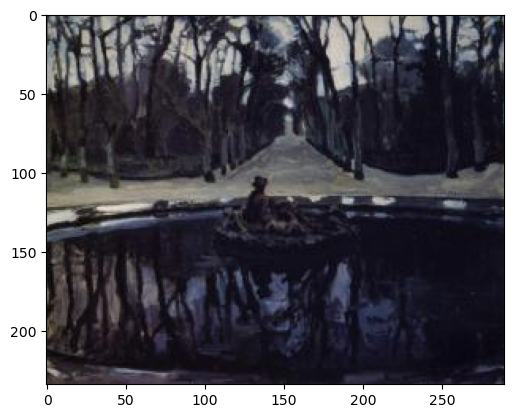

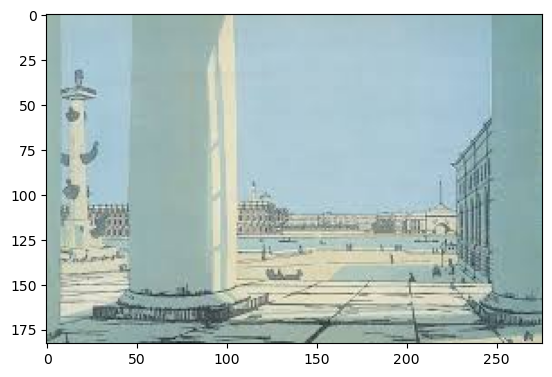

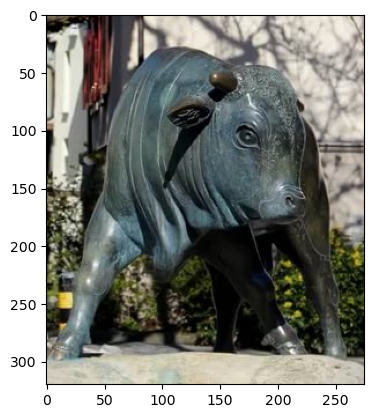

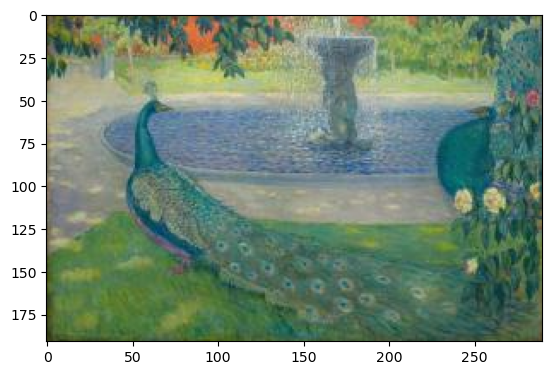

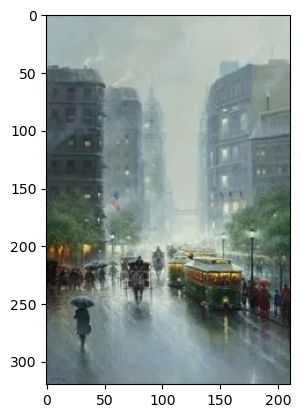

In [48]:
for index in indices.squeeze():
    image = Image.open(filename_paths[:,0][index])
    print(filename_paths[index])
    plt.figure()
    plt.imshow(np.asarray(image))

In [49]:
df_val = retrieve_images(test_dirs_paths)

X_test = np.stack(np.array(df_val['matriz']), axis=0)
y_test = np.stack(np.array(df_val['clase']), axis=0)

# Encode class labels as integers
y_test_encoded = label_encoder.transform(y_test)

print(f"Shape of X: {X_test.shape}")
print(f"Shape of y: {y_test_encoded.shape}")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Se procesaron 955 imágenes correctamente.
16 no pudieron ser procesadas por errores en formato.
Se encontraron 152 imágenes duplicadas
Shape of X: (955, 150, 150, 3)
Shape of y: (955,)
30/30 [==============================] - 1s 14ms/step - loss: 0.5247 - accuracy: 0.7948
Test Loss: 0.5247342586517334
Test Accuracy: 0.7947643995285034


In [51]:
base_path = train_dirs_paths

file_sizes = dict() 

for dir_ in os.listdir(base_path):
    file_sizes[dir_] = len(os.listdir(os.path.join(base_path, dir_)))

In [52]:
file_sizes

{'drawings': 1126,
 'engraving': 785,
 'iconography': 2134,
 'painting': 2358,
 'sculpture': 1893}

In [53]:
np.array(list(file_sizes.values()))  / sum(file_sizes.values())

array([0.13572806, 0.09462392, 0.2572324 , 0.28423337, 0.22818226])